## **Actividad: Problemas de clasificación**

**Andrés Alejandro Guzmán González - A01633819**



In [58]:
# Llamado a librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,StratifiedKFold
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, make_scorer, f1_score
from sklearn.feature_selection import SelectKBest, f_classif, RFE, SequentialFeatureSelector
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import random


### **Ejercicio 1 (50 puntos)**

En este ejercicio trabajarás con el conjunto de datos que se te asignó de acuerdo al último número de tu matrícula (ver las notas del ejercicio). En estos archivos se tienen datos procesados de un experimento de psicología en el que se mide la respuesta cerebral cuando un sujeto presta atención a un estímulo visual que aparece de manera repentina y cuando no presta atención a dicho estímulo visual. Los datos están en archivos de texto, los cuales se cargan con la función loadtxt de numpy.
* La primera columna corresponde a la clase (1 o 2).
  * La clase 1 representa cuando el sujeto está prestando atención.
  * La clase 2 cuando no lo hace.
* La segunda columna se ignora.
* El resto de las columnas indican las variables que se calcularon de la respuesta cerebral medida con la técnicas de Electroencefaolografía para cada caso.

Para tu conjunto de datos:

4. Con alguno de los clasificadores que probaste en los pasos anteriores, determina el número óptimo de características utilizando un método tipo Filter.
5. Repite el paso anterior, pero para un método de selección de características de tipo Wrapper.
6. Repite el paso 4, pero para un método de selección de características de tipo Filter-Wrapper.
7. Escoge alguna de las técnicas de selección de características que probaste con anteioridad, y con el número óptimo de características encontrado, prepara tu modelo para producción haciendo lo siguiente:
    * Aplica el método de selección de características con todos los datos.
    * Ajusta el modelo con las características encontradas.
8. Contesta las siguientes preguntas:
  * ¿Qué pasa si no se considera el problema de tener datos desbalanceados para este caso? ¿Por qué?
  * De todos los clasificadores, ¿cuál o cuales consideras que son adecuados para los datos? ¿Qué propiedades tienen dichos modelos que los hacen apropiados para los datos? Argumenta tu respuesta.
  * ¿Es posibles reducir la dimensionalidad del problema sin perder rendimiento en el modelo? ¿Por qué?
  * ¿Qué método de selección de características consideras el más adecuado para este caso? ¿Por qué?
  * Si quisieras mejorar el rendimiento de tus modelos, ¿qué más se podría hacer?

In [6]:
df = np.loadtxt('/content/sample_data/P1_5.txt')
df

array([[ 1.        ,  0.        ,  6.77864488, ...,  0.74260514,
         0.34744616,  0.13121125],
       [ 1.        ,  1.        , -0.35472517, ...,  2.01310089,
         1.28743036,  0.52126382],
       [ 1.        ,  1.        ,  1.7277155 , ...,  0.28858532,
         0.67945384,  0.82215485],
       ...,
       [ 2.        ,  0.        ,  2.07424806, ...,  1.18131646,
         1.38569938,  0.99976084],
       [ 2.        ,  1.        , -0.05645914, ...,  0.74215356,
         0.1240741 , -0.09048593],
       [ 2.        ,  1.        , -0.04833282, ...,  1.04595614,
         0.73797014,  0.83197572]])

#### **Paso 1.**
Determina si es necesario balancear los datos. En caso de que sea afirmativo, en todo este ejercicio tendrás que utilizar alguna estrategia para mitigar el problema de tener una muestra desbalanceada.

In [7]:
# Variables del modelo
x = df[:,2:]
# Variable de respuesta
y = df[:,0]

Muestra desbalanceada

In [8]:
kf = StratifiedKFold(n_splits=10, shuffle=True)
clasf = SVC(kernel='linear')
y_test = []
y_pred = []

for train_indx, test_indx in kf.split(x,y):
    # Fase de entrenamiento
    x_train = x[train_indx, :]
    y_train = y[train_indx]
    clasf.fit(x_train, y_train)
    # Fase de prueba
    x_test_ = x[test_indx, :]
    y_test_ = y[test_indx]
    y_pred_ = clasf.predict(x_test_)
    y_test.append(y_test_)
    y_pred.append(y_pred_)
print(classification_report(np.concatenate(y_test), np.concatenate(y_pred)))

              precision    recall  f1-score   support

         1.0       0.74      0.61      0.67       281
         2.0       0.94      0.97      0.95      1689

    accuracy                           0.91      1970
   macro avg       0.84      0.79      0.81      1970
weighted avg       0.91      0.91      0.91      1970



Muestra balanceada

In [10]:

##### Accuracy with balanced sample (Subsamplig) #####

print("----- Subsamplig -----")

clf = SVC(kernel = 'linear')
kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    # Training phase
    x_train = x[train_index, :]
    y_train = y[train_index]

    x1 = x_train[y_train==1, :]
    y1 = y_train[y_train==1]
    n1 = len(y1)

    x2 = x_train[y_train==2, :]
    y2 = y_train[y_train==2]
    n2 = len(y2)

    ind = random.sample([i for i in range(n2)], n1)

    x_sub = np.concatenate((x1, x2[ind,:]), axis=0)
    y_sub = np.concatenate((y1, y2[ind]), axis=0)

    clf.fit(x_sub, y_sub)

    # Test phase
    x_test = x[test_index, :]
    y_test = y[test_index]
    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

##### Accuracy with balanced sample (Upsampling) #####
print("----- Upsampling -----")

clf = SVC(kernel = 'linear')
kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    # Training phase
    x_train = x[train_index, :]
    y_train = y[train_index]

    x1 = x_train[y_train==1, :]
    y1 = y_train[y_train==1]
    n1 = len(y1)

    x2 = x_train[y_train==2, :]
    y2 = y_train[y_train==2]
    n2 = len(y2)

    ind = random.choices([i for i in range(n1)], k = n2)

    x_sub = np.concatenate((x1[ind,:], x2), axis=0)
    y_sub = np.concatenate((y1[ind], y2), axis=0)

    clf.fit(x_sub, y_sub)

    # Test phase
    x_test = x[test_index, :]
    y_test = y[test_index]
    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

##### Accuracy with balanced sample (weighted loss function) #####

print("----- Weighted loss function -----")

clf = SVC(kernel = 'linear', class_weight='balanced')
kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    # Training phase
    x_train = x[train_index, :]
    y_train = y[train_index]
    clf.fit(x_train, y_train)

    # Test phase
    x_test = x[test_index, :]
    y_test = y[test_index]
    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

----- Subsamplig -----
              precision    recall  f1-score   support

         1.0       0.46      0.88      0.61       281
         2.0       0.98      0.83      0.90      1689

    accuracy                           0.84      1970
   macro avg       0.72      0.85      0.75      1970
weighted avg       0.90      0.84      0.86      1970

----- Upsampling -----
              precision    recall  f1-score   support

         1.0       0.56      0.81      0.66       281
         2.0       0.97      0.89      0.93      1689

    accuracy                           0.88      1970
   macro avg       0.76      0.85      0.79      1970
weighted avg       0.91      0.88      0.89      1970

----- Weighted loss function -----
              precision    recall  f1-score   support

         1.0       0.54      0.81      0.65       281
         2.0       0.97      0.89      0.92      1689

    accuracy                           0.88      1970
   macro avg       0.75      0.85      0.79    

#### **Paso 2**
Evalúa al menos 5 modelos de clasificación distintos utilizando validación cruzada, y determina cuál de ellos es el más efectivo.

In [6]:
models = {
  'Linear-SVM' : SVC(kernel='linear'),
  'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
  'KNeighbors': KNeighborsClassifier(),
  'Decision Tree': DecisionTreeClassifier(),
  'Random Forest': RandomForestClassifier(),
  'RBF-SVM': SVC(kernel='rbf'),
  'Logistic Regression': LogisticRegression(max_iter=1000
                    )
}

avg_f1_sc= {}
scored = make_scorer(f1_score)
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_y_test = []
cv_y_pred = []
for model_name, model in models.items():
    print(f"----- {model_name} -----")
    cv_y_test = []
    cv_y_pred = []
    cv_f1_scores = []
    for train_index, test_index in kf.split(x, y):
        x_train = x[train_index, :]
        y_train = y[train_index]
        x_test = x[test_index, :]
        y_test = y[test_index]
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        cv_y_test.append(y_test)
        cv_y_pred.append(y_pred)
        f1_score_value = f1_score(y_test, y_pred)
        cv_f1_scores.append(f1_score_value)
    avg_f1_score = np.mean(cv_f1_scores)
    avg_f1_sc[model_name] = avg_f1_score
  print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

best_model = max(avg_f1_sc, key=avg_f1_sc.get)
best_f1_score = avg_f1_sc[best_model]

print(" F1-score Average")
for model_name, score in avg_f1_sc.items():
    print(f"\t{model_name}: {score:.2f}")

print(f"\n El mejor modelo es {best_model} con un F1-score de {best_f1_score:.2f}")

----- Linear-SVM -----
              precision    recall  f1-score   support

         1.0       0.75      0.64      0.69       281
         2.0       0.94      0.97      0.95      1689

    accuracy                           0.92      1970
   macro avg       0.85      0.80      0.82      1970
weighted avg       0.91      0.92      0.92      1970

----- Linear Discriminant Analysis -----
              precision    recall  f1-score   support

         1.0       0.75      0.59      0.66       281
         2.0       0.93      0.97      0.95      1689

    accuracy                           0.91      1970
   macro avg       0.84      0.78      0.81      1970
weighted avg       0.91      0.91      0.91      1970

----- KNeighbors -----
              precision    recall  f1-score   support

         1.0       0.73      0.25      0.38       281
         2.0       0.89      0.98      0.93      1689

    accuracy                           0.88      1970
   macro avg       0.81      0.62      0.

#### **Paso 3**
Implementa desde cero el método de regresión logística, y evalúalo con el conjunto de datos.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
class LogisticRegressionS:
    def __init__(self, alpha=0.0005, max_iterations=100000):
        self.alpha = alpha
        self.max_iterations = max_iterations

    def sigmoid(self, z):
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        self.beta = self.fit_model(X, y, self.alpha, self.max_iterations)

    def fit_model(self, X, y, alpha=0.0005, max_iterations=100000):
        npredictors = X.shape[1]
        beta = 2 * np.random.rand(npredictors) - 1.0
        it = 0

        while (np.linalg.norm(self.gradient(X, y, beta)) > 1e-4) and (it < max_iterations):
            beta = beta - alpha * self.gradient(X, y, beta)
            it = it + 1

        return beta

    def gradient(self, X, y, beta):
        xbeta = X @ beta
        c0 = (y == 0)
        c1 = (y == 1)

        exp0 = np.exp(xbeta[c0])
        l0 = (exp0 / (1 + exp0)) * X[c0, :].transpose()

        exp1 = np.exp(xbeta[c1])
        l1 = (exp1 / (1 + exp1)) * X[c1, :].transpose()

        return l0.sum(axis=1) - l1.sum(axis=1)

    def predict(self, X):
        xbeta = X @ self.beta
        tmp = 1. / (1. + np.exp(-xbeta))
        return (tmp > 0.5).astype("int32")

    def accuracy(self, y_true, y_pred):
        return np.mean(y_true == y_pred)

In [10]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [11]:
# Hacemos el modelo con nuestra clase
model = LogisticRegressionS(alpha=0.0005, max_iterations=100)
model.fit(x, y)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular y mostrar la precisión
accuracy = model.accuracy(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Imprime un informe de clasificación detallado
print(classification_report(y_test, y_pred, zero_division=1))

Accuracy: 13.45%
              precision    recall  f1-score   support

         0.0       0.00      1.00      0.00         0
         1.0       0.27      0.93      0.42        57
         2.0       1.00      0.00      0.00       337

    accuracy                           0.13       394
   macro avg       0.42      0.64      0.14       394
weighted avg       0.89      0.13      0.06       394



#### **Paso 4**
Con alguno de los clasificadores que probaste en los pasos anteriores, determina el número óptimo de características utilizando un método tipo Filter.

In [14]:
# Reducimos el número de características a la mitad
print("----- Selección de características usando el 50% de los predictores -----")
# Seleccionamos las características
fselection = SelectKBest(f_classif, k = 6)
fselection.fit(x, y)
print("Características seleccionadas: ", fselection.get_feature_names_out())
# Ajustamos el modelo utilizando el nuevo conjunto de datos
clf = SVC(kernel='linear')
x_transformed = fselection.transform(x)
clf.fit(x_transformed, y)
# Evaluamos el modelo utilizando validación cruzada
cv_y_test = []
cv_y_pred = []
kf = StratifiedKFold(n_splits=5, shuffle=True)
for train_index, test_index in kf.split(x, y):
    # Fase de entrenamiento
    x_train = x[train_index, :]
    y_train = y[train_index]
    clf_cv = SVC(kernel='linear')
    fselection_cv = SelectKBest(f_classif, k = 6)
    fselection_cv.fit(x_train, y_train)
    x_train = fselection_cv.transform(x_train)
    clf_cv.fit(x_train, y_train)
    # Fase de prueba
    x_test = fselection_cv.transform(x[test_index, :])
    y_test = y[test_index]
    y_pred = clf_cv.predict(x_test)
    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)
print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

----- Selección de características usando el 50% de los predictores -----
Características seleccionadas:  ['x9' 'x10' 'x77' 'x78' 'x88' 'x89']
              precision    recall  f1-score   support

         1.0       0.78      0.14      0.24       281
         2.0       0.87      0.99      0.93      1689

    accuracy                           0.87      1970
   macro avg       0.83      0.57      0.59      1970
weighted avg       0.86      0.87      0.83      1970



----- Selección óptima del número de características -----
---- n características = 1
---- n características = 2
---- n características = 3
---- n características = 4
---- n características = 5
---- n características = 6
---- n características = 7
---- n características = 8
---- n características = 9
---- n características = 10
---- n características = 11
---- n características = 12
---- n características = 13
Número óptimo de características:  10


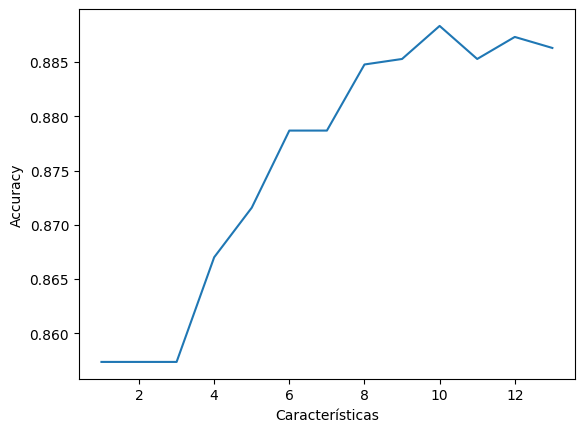

In [16]:
# Encontramos el número óptimo de características utilizando validación cruzada
print("----- Selección óptima del número de características -----")
n_feats = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
acc_nfeat = []
for n_feat in n_feats:
    print('---- n características =', n_feat)
    acc_cv = []
    kf = StratifiedKFold(n_splits=5, shuffle=True)
    for train_index, test_index in kf.split(x, y):
        # Fase de entrenamiento
        x_train = x[train_index, :]
        y_train = y[train_index]
        clf_cv = SVC(kernel='linear')
        fselection_cv = SelectKBest(f_classif, k = n_feat)
        fselection_cv.fit(x_train, y_train)
        x_train = fselection_cv.transform(x_train)
        clf_cv.fit(x_train, y_train)
        # Fase de prueba
        x_test = fselection_cv.transform(x[test_index, :])
        y_test = y[test_index]
        y_pred = clf_cv.predict(x_test)
        acc_i = accuracy_score(y_test, y_pred)
        acc_cv.append(acc_i)
    acc = np.average(acc_cv)
    acc_nfeat.append(acc)
opt_index = np.argmax(acc_nfeat)
opt_features = n_feats[opt_index]
print("Número óptimo de características: ", opt_features)
plt.plot(n_feats, acc_nfeat)
plt.xlabel("Características")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
SVC(kernel='linear')

#### **Paso 5**

Repite el paso anterior, pero para un método de selección de características de tipo Wrapper.

In [ ]:
# Reducimos el número de características a la mitad
print("----- Selección de características usando el 50% de los predictores -----")
# Seleccionamos las características
clf = SVC(kernel='linear')
fselection = SequentialFeatureSelector(clf, n_features_to_select = 0.5)
fselection.fit(x, y)
print("Selected features: ", fselection.get_feature_names_out())
# Ajustamos el modelo utilizando el nuevo conjunto de datos
x_transformed = fselection.transform(x)
clf.fit(x_transformed, y)
# Evaluamos el modelo utilizando validación cruzada
cv_y_test = []
cv_y_pred = []
kf = StratifiedKFold(n_splits=5, shuffle = True)
for train_index, test_index in kf.split(x, y):
    # Fase de entrenamiento
    x_train = x[train_index, :]
    y_train = y[train_index]
    clf_cv = SVC(kernel='linear')
    fselection_cv = SequentialFeatureSelector(clf_cv, n_features_to_select=0.5)
    fselection_cv.fit(x_train, y_train)
    x_train = fselection_cv.transform(x_train)
    clf_cv.fit(x_train, y_train)
    # Fase de prueba
    x_test = fselection_cv.transform(x[test_index, :])
    y_test = y[test_index]
    y_pred = clf_cv.predict(x_test)
    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)
print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

Si bien se implemntó el método con el Linear SVC, este no fue eficiente, lo cual puede ser a cauda del tamño de la muestra, la gran cantidad de caracteríaticas seleccionadas y finalmente la gran conplagidad del modelo. Esto resurtó en un tiempo de ejecición mayor a 2 horas agotando los recursos del entorno.

Por ello se procedió a ejecutar con regresión logística:

In [25]:
# Reducimos el número de características a la mitad
print("----- Selección de características usando el 50% de los predictores -----")
# Seleccionamos las características
clf = LogisticRegression(max_iter=10000)
fselection = SequentialFeatureSelector(clf, n_features_to_select = 0.5)
fselection.fit(x, y)
print("Selected features: ", fselection.get_feature_names_out())
# Ajustamos el modelo utilizando el nuevo conjunto de datos
x_transformed = fselection.transform(x)
clf.fit(x_transformed, y)
# Evaluamos el modelo utilizando validación cruzada
cv_y_test = []
cv_y_pred = []
kf = StratifiedKFold(n_splits=5, shuffle = True)
for train_index, test_index in kf.split(x, y):
    # Fase de entrenamiento
    x_train = x[train_index, :]
    y_train = y[train_index]
    clf_cv = LogisticRegression(max_iter=10000)
    fselection_cv = SequentialFeatureSelector(clf_cv, n_features_to_select=0.5)
    fselection_cv.fit(x_train, y_train)
    x_train = fselection_cv.transform(x_train)
    clf_cv.fit(x_train, y_train)
    # Fase de prueba
    x_test = fselection_cv.transform(x[test_index, :])
    y_test = y[test_index]
    y_pred = clf_cv.predict(x_test)
    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)
print('\n')
print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

----- Selección de características usando el 50% de los predictores -----
Selected features:  ['x1' 'x3' 'x9' 'x10' 'x11' 'x13' 'x21' 'x23' 'x27' 'x28' 'x29' 'x32'
 'x33' 'x34' 'x35' 'x36' 'x37' 'x38' 'x39' 'x40' 'x41' 'x42' 'x43' 'x45'
 'x49' 'x54' 'x55' 'x56' 'x57' 'x58' 'x59' 'x62' 'x63' 'x69' 'x72' 'x73'
 'x79' 'x82' 'x85' 'x88' 'x89' 'x90' 'x91' 'x92' 'x93' 'x94' 'x95' 'x96'
 'x97' 'x98' 'x99' 'x100' 'x101' 'x107' 'x112' 'x113' 'x114' 'x115' 'x116'
 'x117' 'x118' 'x119' 'x120' 'x121' 'x122' 'x123' 'x124' 'x125' 'x126'
 'x127' 'x130' 'x133' 'x134' 'x143' 'x144' 'x149']
              precision    recall  f1-score   support

         1.0       0.72      0.51      0.60       281
         2.0       0.92      0.97      0.94      1689

    accuracy                           0.90      1970
   macro avg       0.82      0.74      0.77      1970
weighted avg       0.89      0.90      0.89      1970



----- Selección óptima del número de características -----
---- n características = 1
---- n características = 2
---- n características = 3
---- n características = 4
---- n características = 5
---- n características = 6
---- n características = 7
---- n características = 8
---- n características = 9
---- n características = 10
---- n características = 11
---- n características = 12
---- n características = 13
Número óptimo de características:  11


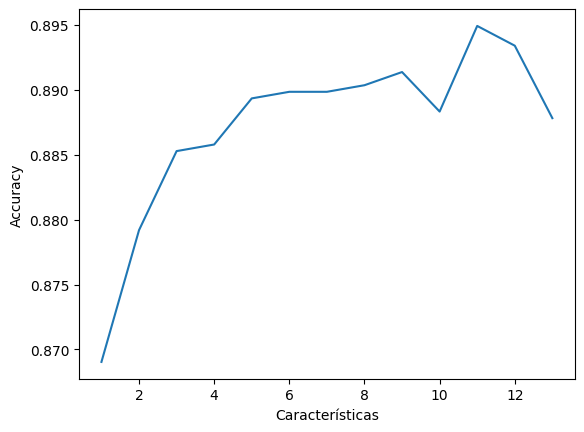

In [26]:
# Encontrar el número óptimo de características utilizando validación cruzada
print("----- Selección óptima del número de características -----")
n_feats = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
acc_nfeat = []
for n_feat in n_feats:
    print('---- n características =', n_feat)
    acc_cv = []
    kf = StratifiedKFold(n_splits=5, shuffle = True)
    for train_index, test_index in kf.split(x, y):
        # Fase de entrenamiento
        x_train = x[train_index, :]
        y_train = y[train_index]
        clf_cv = LogisticRegression()
        fselection_cv = SequentialFeatureSelector(clf_cv,n_features_to_select=n_feat)
        fselection_cv.fit(x_train, y_train)
        x_train = fselection_cv.transform(x_train)
        clf_cv.fit(x_train, y_train)
        # Fase de prueba
        x_test = fselection_cv.transform(x[test_index, :])
        y_test = y[test_index]
        y_pred = clf_cv.predict(x_test)
        acc_i = accuracy_score(y_test, y_pred)
        acc_cv.append(acc_i)
    acc = np.average(acc_cv)
    acc_nfeat.append(acc)
opt_index = np.argmax(acc_nfeat)
opt_features = n_feats[opt_index]
print("Número óptimo de características: ", opt_features)
plt.plot(n_feats, acc_nfeat)
plt.xlabel("Características")
plt.ylabel("Accuracy")
plt.show()

#### **Paso 6**
Repite el paso 4, pero para un método de selección de características de tipo Filter-Wrapper.

In [27]:
# Reducimos el número de características a la mitad
print("----- Selección de características usando el 50% de los predictores -----")
# Seleccionamos las características
clf = SVC(kernel='linear')
fselection = RFE(clf, n_features_to_select = 0.5)
fselection.fit(x, y)
print("Características seleccionadas", fselection.get_feature_names_out())
# Ajustamos el modelo utilizando el nuevo conjunto de datos
x_transformed = fselection.transform(x)
clf.fit(x_transformed, y)
# Evaluamos el modelo utilizando validación cruzada
cv_y_test = []
cv_y_pred = []
kf = StratifiedKFold(n_splits=5, shuffle = True)
for train_index, test_index in kf.split(x, y):
    # Fase de entrenamiento
    x_train = x[train_index, :]
    y_train = y[train_index]
    clf_cv = SVC(kernel='linear')
    fselection_cv = RFE(clf_cv, n_features_to_select=0.5)
    fselection_cv.fit(x_train, y_train)
    x_train = fselection_cv.transform(x_train)
    clf_cv.fit(x_train, y_train)
    # Fase de prueba
    x_test = fselection_cv.transform(x[test_index, :])
    y_test = y[test_index]
    y_pred = clf_cv.predict(x_test)
    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)
print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

----- Selección de características usando el 50% de los predictores -----
Características seleccionadas ['x1' 'x6' 'x8' 'x9' 'x10' 'x13' 'x14' 'x16' 'x23' 'x26' 'x31' 'x33' 'x35'
 'x39' 'x40' 'x41' 'x45' 'x47' 'x50' 'x53' 'x58' 'x59' 'x60' 'x61' 'x62'
 'x63' 'x64' 'x65' 'x68' 'x70' 'x72' 'x75' 'x78' 'x81' 'x88' 'x89' 'x92'
 'x97' 'x99' 'x100' 'x101' 'x103' 'x104' 'x105' 'x109' 'x112' 'x113'
 'x114' 'x115' 'x116' 'x117' 'x118' 'x119' 'x120' 'x122' 'x123' 'x124'
 'x125' 'x126' 'x127' 'x128' 'x129' 'x130' 'x131' 'x132' 'x133' 'x134'
 'x135' 'x136' 'x138' 'x140' 'x141' 'x142' 'x144' 'x146' 'x152']
              precision    recall  f1-score   support

         1.0       0.71      0.60      0.65       281
         2.0       0.93      0.96      0.95      1689

    accuracy                           0.91      1970
   macro avg       0.82      0.78      0.80      1970
weighted avg       0.90      0.91      0.91      1970



----- Selección óptima del número de características -----
---- n características = 1
---- n características = 2
---- n características = 3
---- n características = 4
---- n características = 5
---- n características = 6
---- n características = 7
---- n características = 8
---- n características = 9
---- n características = 10
---- n características = 11
---- n características = 12
---- n características = 13
Número óptimo de características:  13


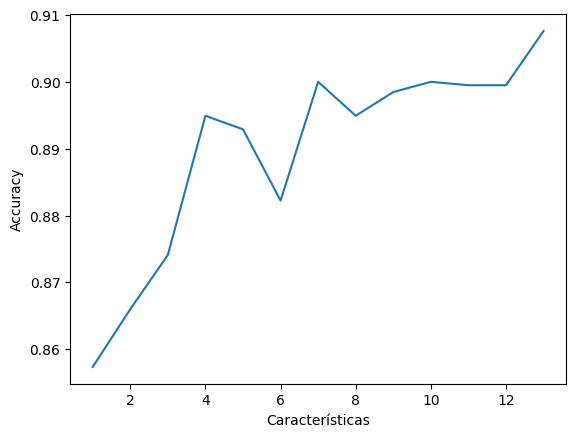

In [28]:
# Encontrar el número óptimo de características utilizando validación cruzada
print("----- Selección óptima del número de características -----")
n_feats = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
acc_nfeat = []
for n_feat in n_feats:
    print('---- n características =', n_feat)
    acc_cv = []
    kf = StratifiedKFold(n_splits=5, shuffle = True)
    for train_index, test_index in kf.split(x, y):
        # Training phase
        x_train = x[train_index, :]
        y_train = y[train_index]
        clf_cv = SVC(kernel='linear')
        fselection_cv = RFE(clf_cv, n_features_to_select=n_feat)
        fselection_cv.fit(x_train, y_train)
        x_train = fselection_cv.transform(x_train)
        clf_cv.fit(x_train, y_train)
        # Test phase
        x_test = fselection_cv.transform(x[test_index, :])
        y_test = y[test_index]
        y_pred = clf_cv.predict(x_test)
        acc_i = accuracy_score(y_test, y_pred)
        acc_cv.append(acc_i)
    acc = np.average(acc_cv)
    acc_nfeat.append(acc)
opt_index = np.argmax(acc_nfeat)
opt_features = n_feats[opt_index]
print("Número óptimo de características: ", opt_features)
plt.plot(n_feats, acc_nfeat)
plt.xlabel("Características")
plt.ylabel("Accuracy")
plt.show()

#### **Paso 7**

Escoge alguna de las técnicas de selección de características que probaste con anteioridad, y con el número óptimo de características encontrado, prepara tu modelo para producción haciendo lo siguiente:

- Aplica el método de selección de características con todos los datos.
- Ajusta el modelo con las características encontradas.


In [29]:
# Filter-Wrapper
clf = SVC(kernel='linear')
fselection = RFE(clf, n_features_to_select = opt_features)
fselection.fit(x, y)
print("Características seleccionadas: ", fselection.get_feature_names_out())
x_transformed = fselection.transform(x)
clf.fit(x_transformed, y)
y_pred = clf.predict(x_transformed)
print(classification_report(y, y_pred))

Características seleccionadas:  ['x1' 'x8' 'x10' 'x14' 'x40' 'x41' 'x62' 'x65' 'x78' 'x88' 'x92' 'x114'
 'x122']
              precision    recall  f1-score   support

         1.0       0.80      0.48      0.60       281
         2.0       0.92      0.98      0.95      1689

    accuracy                           0.91      1970
   macro avg       0.86      0.73      0.78      1970
weighted avg       0.90      0.91      0.90      1970



#### **Paso 8**

Contesta las siguientes preguntas:
* ¿Qué pasa si no se considera el problema de tener datos desbalanceados para este caso? ¿Por qué?
   
   Para este caso y para la mayoría, el tener un conjunto de datos desbalanceado podría significar que el modelo tenga un sesgo; dando prioridad a la clasificar datos al segmeto de datos con mayor presencia en la muestra.

* De todos los clasificadores, ¿cuál o cuales consideras que son adecuados para los datos? ¿Qué propiedades tienen dichos modelos que los hacen apropiados para los datos? Argumenta tu respuesta.

  En este caso, fue muy eficiente el  Liner - SVC. Pues arrojó que los justes eran mejores en comparación con los demás que si bien había diferencias poco significativas con otros fue el que tivo un mejor ajuste y rendimeinto.

* ¿Es posibles reducir la dimensionalidad del problema sin perder rendimiento en el modelo? ¿Por qué?

  Si, además tendría grandes beneficios pues podría mejorar el rendimiento y la eficiecia de los procesos de selección de caracteríaticas y clasifiación. Sin embargo, es importante mencionar que el reducir la dimensionalidad también puede generar la pérdida de datos relavantes para el modelo.

* ¿Qué método de selección de características consideras el más adecuado para este caso? ¿Por qué?

  Para este conjunto de datos el método Filter - Wrapper fue muy eficiente en conjunto con el modelo Liner - SVC. Esto se debe principalmente a sus sencillez y la demanada computacional pues pudo ejecutarse en un tiempo si bien un poco elevado no tanto como el Filter. Permitiendo tener un manejo eficiente de los datos.

* Si quisieras mejorar el rendimiento de tus modelos, ¿qué más se podría hacer?

  Algunas estrategias podrían ser el análisis de errores, la búsqueda de hiperparámetros o incluso aumentar el tamaño de la muestra, sin olvidar el balanceo de los datos.

### **Ejercicio 2**

En este ejercicio trabajarás con datos que vienen de un experimento en el que se midió actividad muscular con la técnica de la Electromiografía en el brazo derecho de varios participantes cuando éstos realizaban un movimiento con la mano entre siete posible (Flexionar hacia arriba, Flexionar hacia abajo, Cerrar la mano, Estirar la mano, Abrir la mano, Coger un objeto, No moverse). Al igual que en el ejercicio anterior, los datos se cargan con la función loadtxt de numpy. A su vez:
* La primera columna corresponde a la clase (1, 2, 3, 4, 5, 6, y 7).
* La segunda columna se ignora.
* El resto de las columnas indican las variables que se calcularon de la respuesta muscular.

El archivo de datos con el que trabajarás depende de tu matrícula.

Para este conjunto de datos:

In [11]:
df2 = np.loadtxt('/content/sample_data/M_1.txt')
df2

array([[ 1.        ,  1.        ,  0.6819565 , ...,  1.69262835,
         1.34553809,  1.81638713],
       [ 1.        ,  1.        ,  0.56855303, ...,  0.64268369,
         0.38791499,  1.59719973],
       [ 1.        ,  1.        ,  1.43149784, ...,  0.53153428,
         1.10834576,  2.14520145],
       ...,
       [ 7.        ,  1.        , -4.63831072, ..., -1.9786276 ,
        -4.04741071, -5.17131175],
       [ 7.        ,  1.        , -5.2325368 , ..., -1.31486405,
        -4.31667728, -4.56499901],
       [ 7.        ,  1.        , -4.95990009, ..., -1.47060583,
        -4.8555384 , -5.13386256]])

In [25]:
# Variables predictoras
x = df2[:,2:]
# Variable de respuesta
y = df2[:,0]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

#### **Paso 1**

Determina si es necesario balancear los datos. En caso de que sea afirmativo, en todo este ejercicio tendrás que utilizar alguna estrategia para mitigar el problema de tener una muestra desbalanceada.


Muestra desbalanceada:

In [26]:
kf = StratifiedKFold(n_splits=10, shuffle=True)
clasf = SVC(kernel='linear')
y_test = []
y_pred = []

for train_indx, test_indx in kf.split(x,y):
    # Fase de entrenamiento
    x_train = x[train_indx, :]
    y_train = y[train_indx]
    clasf.fit(x_train, y_train)
    # Fase de prueba
    x_test_ = x[test_indx, :]
    y_test_ = y[test_indx]
    y_pred_ = clasf.predict(x_test_)
    y_test.append(y_test_)
    y_pred.append(y_pred_)
print(classification_report(np.concatenate(y_test), np.concatenate(y_pred)))

              precision    recall  f1-score   support

         1.0       0.99      1.00      0.99        90
         2.0       0.95      0.99      0.97        90
         3.0       0.97      0.96      0.96        90
         4.0       1.00      0.99      0.99        90
         5.0       1.00      0.99      0.99        90
         6.0       0.95      0.92      0.94        90
         7.0       0.99      1.00      0.99        90

    accuracy                           0.98       630
   macro avg       0.98      0.98      0.98       630
weighted avg       0.98      0.98      0.98       630



Muestra balanceada:

In [27]:
##### Accuracy with balanced sample (Subsamplig) #####

print("----- Subsamplig -----")

clf = SVC(kernel = 'linear')
kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    # Training phase
    x_train = x[train_index, :]
    y_train = y[train_index]

    x1 = x_train[y_train==1, :]
    y1 = y_train[y_train==1]
    n1 = len(y1)

    x2 = x_train[y_train==2, :]
    y2 = y_train[y_train==2]
    n2 = len(y2)

    ind = random.sample([i for i in range(n2)], n1)

    x_sub = np.concatenate((x1, x2[ind,:]), axis=0)
    y_sub = np.concatenate((y1, y2[ind]), axis=0)

    clf.fit(x_sub, y_sub)

    # Test phase
    x_test = x[test_index, :]
    y_test = y[test_index]
    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

##### Accuracy with balanced sample (Upsampling) #####
print("----- Upsampling -----")

clf = SVC(kernel = 'linear')
kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    # Training phase
    x_train = x[train_index, :]
    y_train = y[train_index]

    x1 = x_train[y_train==1, :]
    y1 = y_train[y_train==1]
    n1 = len(y1)

    x2 = x_train[y_train==2, :]
    y2 = y_train[y_train==2]
    n2 = len(y2)

    ind = random.choices([i for i in range(n1)], k = n2)

    x_sub = np.concatenate((x1[ind,:], x2), axis=0)
    y_sub = np.concatenate((y1[ind], y2), axis=0)

    clf.fit(x_sub, y_sub)

    # Test phase
    x_test = x[test_index, :]
    y_test = y[test_index]
    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))



----- Subsamplig -----
              precision    recall  f1-score   support

         1.0       0.49      1.00      0.65        90
         2.0       0.20      1.00      0.34        90
         3.0       0.00      0.00      0.00        90
         4.0       0.00      0.00      0.00        90
         5.0       0.00      0.00      0.00        90
         6.0       0.00      0.00      0.00        90
         7.0       0.00      0.00      0.00        90

    accuracy                           0.29       630
   macro avg       0.10      0.29      0.14       630
weighted avg       0.10      0.29      0.14       630

----- Upsampling -----
              precision    recall  f1-score   support

         1.0       0.49      1.00      0.66        90
         2.0       0.20      1.00      0.33        90
         3.0       0.00      0.00      0.00        90
         4.0       0.00      0.00      0.00        90
         5.0       0.00      0.00      0.00        90
         6.0       0.00      0.0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [28]:
# Calcular las muestras por clase
cantidad_clase_1 = np.sum(y == 1)
cantidad_clase_2 = np.sum(y == 2)
cantidad_clase_3 = np.sum(y == 3)
cantidad_clase_4 = np.sum(y == 4)
cantidad_clase_5 = np.sum(y == 5)
cantidad_clase_6 = np.sum(y == 6)
cantidad_clase_7 = np.sum(y == 7)

# Imprimir la cantidad de muestras de cada clase
print(f'Muestras - clase 1: {cantidad_clase_1}')
print(f'Muestras - clase 2: {cantidad_clase_2}')
print(f'Muestras - clase 3: {cantidad_clase_3}')
print(f'Muestras - clase 4: {cantidad_clase_4}')
print(f'Muestras - clase 5: {cantidad_clase_5}')
print(f'Muestras - clase 6: {cantidad_clase_6}')
print(f'Muestras - clase 7: {cantidad_clase_7}')

Muestras - clase 1: 90
Muestras - clase 2: 90
Muestras - clase 3: 90
Muestras - clase 4: 90
Muestras - clase 5: 90
Muestras - clase 6: 90
Muestras - clase 7: 90


Aquí me di cuenta que las muestras de todas la clases del conjuto de datos están balancedas lo que hace sentido al ver los resultados de los procesos de balanceo; las muestras ya están balanceadas.

#### **Paso 2**
Evalúa al menos 5 modelos de clasificación distintos utilizando validación cruzada, y determina cuál de ellos es el más efectivo.


In [30]:
models = {
  'Linear-SVM' : SVC(kernel='linear'),
  'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
  'KNeighbors': KNeighborsClassifier(),
  'Decision Tree': DecisionTreeClassifier(),
  'Random Forest': RandomForestClassifier(),
  'RBF-SVM': SVC(kernel='rbf'),
  'Logistic Regression': LogisticRegression(max_iter=20000)
}

avg_f1_sc= {}
scored = make_scorer(f1_score)
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_y_test = []
cv_y_pred = []
for model_name, model in models.items():
  print(f"----- {model_name} -----")
  cv_y_test = []
  cv_y_pred = []
  cv_f1_scores = []
  for train_index, test_index in kf.split(x, y):
    x_train = x[train_index, :]
    y_train = y[train_index]
    x_test = x[test_index, :]
    y_test = y[test_index]
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)
    f1_score_value = f1_score(y_test, y_pred, average='weighted')
    cv_f1_scores.append(f1_score_value)
  avg_f1_score = np.mean(cv_f1_scores)
  avg_f1_sc[model_name] = avg_f1_score
  print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

best_model = max(avg_f1_sc, key=avg_f1_sc.get)
best_f1_score = avg_f1_sc[best_model]

print(" F1-score Average")
for model_name, score in avg_f1_sc.items():
  print(f"\t{model_name}: {score:.2f}")

print(f"\n El mejor modelo es {best_model} con un F1-score de {best_f1_score:.2f}")

----- Linear-SVM -----
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        90
         2.0       0.93      0.99      0.96        90
         3.0       0.98      0.94      0.96        90
         4.0       1.00      0.99      0.99        90
         5.0       1.00      0.98      0.99        90
         6.0       0.93      0.92      0.93        90
         7.0       0.99      1.00      0.99        90

    accuracy                           0.97       630
   macro avg       0.98      0.97      0.97       630
weighted avg       0.98      0.97      0.97       630

----- Linear Discriminant Analysis -----
              precision    recall  f1-score   support

         1.0       0.91      0.86      0.88        90
         2.0       0.79      0.84      0.82        90
         3.0       0.83      0.82      0.83        90
         4.0       0.91      0.94      0.93        90
         5.0       0.93      0.83      0.88        90
         6.0  

#### **Paso 3**
Escoge al menos dos clasificadores que hayas evaluado en el paso anterior e identifica sus hiperparámetros. Lleva a cabo el proceso de validación cruzada anidada para evaluar los dos modelos con la selección óptima de hiperparámetros.

In [43]:
params = np.logspace(-3, 1, 100)
accuracy = []

for param in params:
    acc_cv = []
    kf = StratifiedKFold(n_splits=5, shuffle = True)

    for train_index, test_index in kf.split(x, y):
        # Training phase
        x_train = x[train_index, :]
        y_train = y[train_index]

        clf_cv = SVC(C=param, kernel = 'linear')
        clf_cv.fit(x_train, y_train)

        # Test phase
        x_test = x[test_index, :]
        y_test = y[test_index]
        y_pred = clf_cv.predict(x_test)

        acc_i = accuracy_score(y_test, y_pred)
        acc_cv.append(acc_i)

    acc_hyp = np.average(acc_cv)
    accuracy.append(acc_hyp)

optimal_idx = np.argmax(accuracy)
optimal_hyperpar = params[optimal_idx]
print('Optimal Hyperparameter: ', optimal_hyperpar, "\n\tAccuracy: ", accuracy[optimal_idx])

Optimal Hyperparameter:  0.007742636826811269 
	Accuracy:  0.9841269841269842


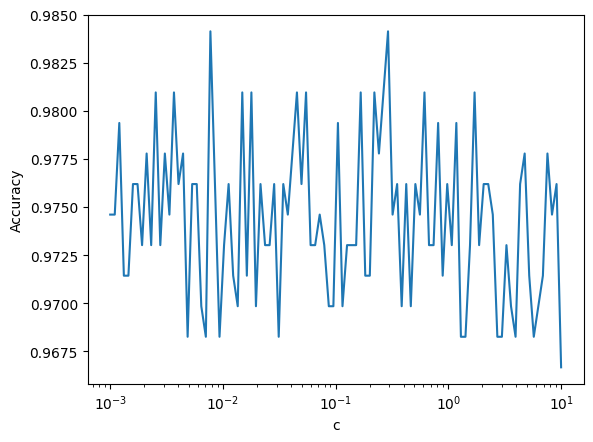

SVC(C=0.007742636826811269, kernel='linear')

In [44]:
plt.plot(params, accuracy)
plt.xscale('log')
plt.xlabel("c")
plt.ylabel("Accuracy")

plt.show()

# Fit model with optimal number of features
clf = SVC(C=optimal_hyperpar, kernel = 'linear')
clf.fit(x, y)

In [55]:
params2 = np.logspace(-3, -1, 100)
accuracy2 = []

for param in params2:
    acc_cv = []
    kf = StratifiedKFold(n_splits=5, shuffle = True)

    for train_index, test_index in kf.split(x, y):
        # Training phase
        x_train = x[train_index, :]
        y_train = y[train_index]

        clf_cv = SVC(C=param, kernel = 'rbf', gamma = param)
        clf_cv.fit(x_train, y_train)

        # Test phase
        x_test = x[test_index, :]
        y_test = y[test_index]
        y_pred = clf_cv.predict(x_test)

        acc_i = accuracy_score(y_test, y_pred)
        acc_cv.append(acc_i)

    acc_hyp = np.average(acc_cv)
    accuracy2.append(acc_hyp)

optimal_idx = np.argmax(accuracy2)
optimal_hyperpar = params2[optimal_idx]
print('Optimal Hyperparameter: ', optimal_hyperpar, "\n\tAccuracy: ", accuracy2[optimal_idx])

Optimal Hyperparameter:  0.0036783797718286343 
	Accuracy:  0.9428571428571428


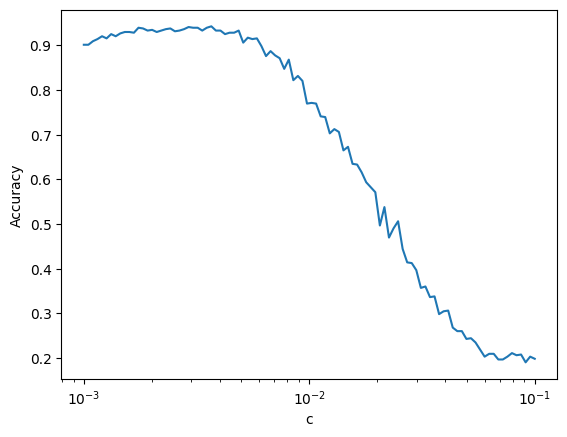

SVC(C=0.0036783797718286343)

In [56]:
plt.plot(params2, accuracy2)
plt.xscale('log')
plt.xlabel("c")
plt.ylabel("Accuracy")

plt.show()

# Fit model with optimal number of features
clf = SVC(C=optimal_hyperpar, kernel = 'rbf')
clf.fit(x, y)

#### **Paso 4**

Prepara tus modelos para producción haciendo lo siguiente:
* Opten los hiperparámetros óptimos utilizando todo el conjunto de datos con validación cruzada.
* Con los hiperparámetros óptimos, ajusta el modelo con todos los datos.


In [62]:
svm_model = SVC(kernel='linear')

# Evaluation with k-Fold Cross-Validation
print("----- Model evaluation with k-Fold Cross-Validation -----")
kf = StratifiedKFold(n_splits=5, shuffle=True)
cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):
    x_train = x[train_index, :]
    y_train = y[train_index]
    x_test = x[test_index, :]
    y_test = y[test_index]

    # Perform hyperparameter grid search for SVM
    parameters = {'C': params}
    clf_cv = GridSearchCV(svm_model, parameters, cv=5)
    clf_cv.fit(x_train, y_train)

    # Predict on the test set
    y_pred = clf_cv.predict(x_test)
    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

# Calculate and print the classification report
print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

# Evaluation with cross_val_predict
print("----- Model evaluation with cross_val_predict -----")
clf = GridSearchCV(svm_model, {'C': params}, cv=5)
y_pred = cross_val_predict(clf, x, y, cv=5)
print(classification_report(y, y_pred))

# Production model
print("----- Production model -----")
clf = GridSearchCV(svm_model, {'C': params}, cv=5)
clf.fit(x, y)
print(clf.best_estimator_)

----- Model evaluation with k-Fold Cross-Validation -----
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        90
         2.0       0.94      0.99      0.96        90
         3.0       0.99      0.94      0.97        90
         4.0       1.00      0.99      0.99        90
         5.0       1.00      1.00      1.00        90
         6.0       0.96      0.94      0.95        90
         7.0       0.99      1.00      0.99        90

    accuracy                           0.98       630
   macro avg       0.98      0.98      0.98       630
weighted avg       0.98      0.98      0.98       630

----- Model evaluation with cross_val_predict -----
              precision    recall  f1-score   support

         1.0       0.99      0.99      0.99        90
         2.0       0.94      0.99      0.96        90
         3.0       0.98      0.93      0.95        90
         4.0       1.00      0.98      0.99        90
         5.0       0.9

#### **Paso 5**

* ¿Observas un problema en cuanto al balanceo de las clases? ¿Por qué?
  
  Definitivamente no, en este caso los datos ya venpian balanceados, teneindo un total de 90 muestras por clase.

* ¿Qué modelo o modelos fueron efectivos para clasificar tus datos? ¿Observas algo especial sobre los modelos? Argumenta tu respuesta.

  Varios modelos resultaron ser efectivos para clasificar los datos, pues tenían buenas méticas por clase y en genral, tal es el caso de:
  * Linear - SVM
  * K Neighbors
  * RBF - SVM
  * Regresión Logística
  Esto puede deberse al balanceo de los datos con respecto a cada una de las clases, sin embargo.

* ¿Observas alguna mejora importante al optimizar hiperparámetros? ¿Es el resultado que esperabas? Argumenta tu respuesta.

  Si bien el ajuste o rendimiento de los datos mejora un poco (1%), para este caso la diferencia no est tanta considerando que los ajustes son buenos desde un inicio al tener una muestra perfectamente balaceada. Sin emabrgo el proceso ayuda a mejorar el ajuste general.

* ¿Qué inconvenientes hay al encontrar hiperparámetros? ¿Por qué?

  Algunos de los problemas que puede tener este proceso es una gran demanda computacional que también dependerá del tamaño de las muestras. También es importante mencionar que si los datos no se tratan adecuadamente, se pude tener un sobreajuste al tener ciertos datos con sergos o incluso desbalanceados lo que destaca la importancia de hacer un buen análisis exploratorio de los mismos.
